In [41]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.insert(0, project_root)

In [42]:
save_folder = Path("../../results/figures/")

In [43]:
dfs = []
for folder in os.listdir(save_folder):
    sub_path = save_folder / folder
    if sub_path.is_dir():
        print(f"Folder: {sub_path}")
        name = str(sub_path).split("_")[-1]
        try:
            df = pd.read_csv(sub_path / "WH-CWC.csv")
            df["name"] = name
            dfs.append(df)
        except Exception as e:
            print(f"Could not read WH-CWC.csv in {sub_path}: {e}")
df = pd.concat(dfs, ignore_index=True).rename(columns={"Unnamed: 0": "method"})

Folder: ..\..\results\figures\Chicago_cross
Folder: ..\..\results\figures\Chicago_jackknife
Folder: ..\..\results\figures\Chicago_enbpi
Folder: ..\..\results\figures\Chicago_aci
Folder: ..\..\results\figures\Chicago_minmax
Folder: ..\..\results\figures\Chicago_split
Folder: ..\..\results\figures\Chicago_GaussianHomos
Folder: ..\..\results\figures\Chicago_GaussianHeteros
Could not read WH-CWC.csv in ..\..\results\figures\Chicago_GaussianHeteros: [Errno 2] No such file or directory: '..\\..\\results\\figures\\Chicago_GaussianHeteros\\WH-CWC.csv'
Folder: ..\..\results\figures\Chicago_ResidualBootstrap
Folder: ..\..\results\figures\Chicago_Poisson


In [44]:
df

,method,WH-CWC,name
0,global_value,0.487278,cross
1,static_weighted,0.305049,cross
2,dynamic_weighted,0.164380,cross
3,global_value,0.492432,jackknife
4,static_weighted,0.301192,jackknife
5,dynamic_weighted,0.149625,jackknife
6,global_value,0.398773,enbpi
7,static_weighted,0.242984,enbpi
8,dynamic_weighted,0.190394,enbpi
9,global_value,0.408595,aci


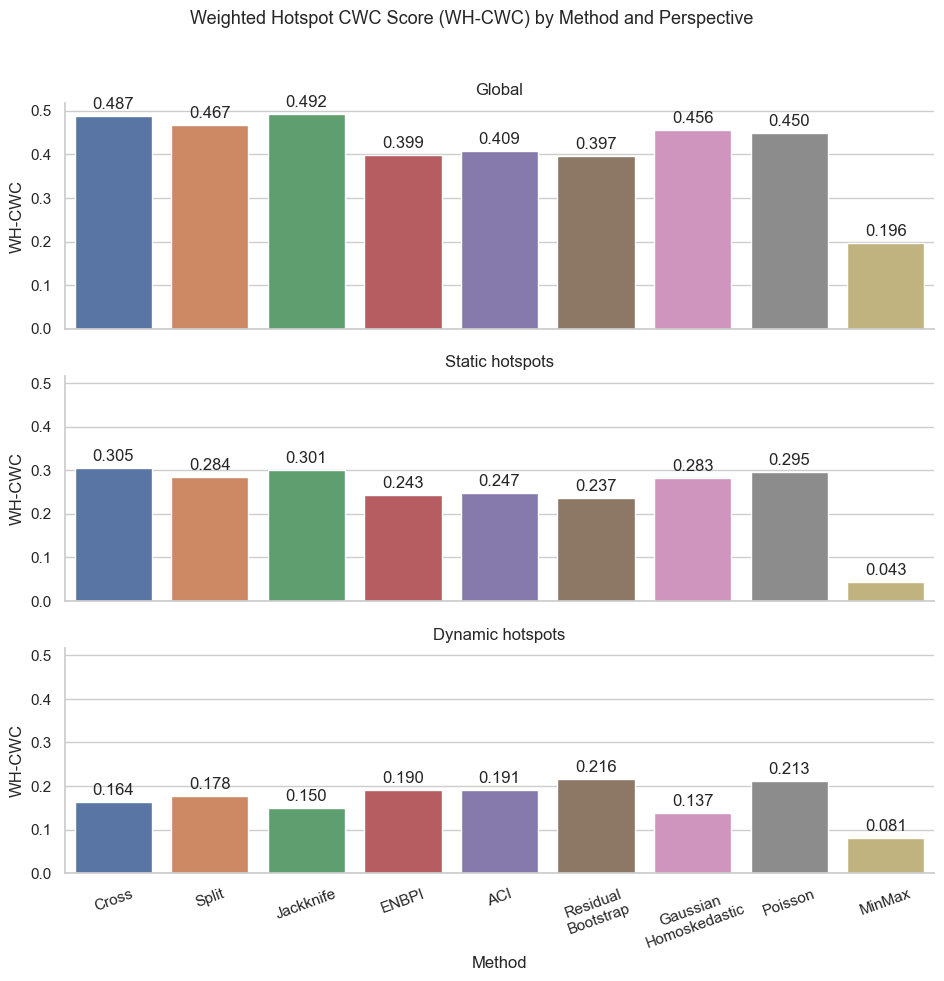

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- tidy labels & ordering ---
name_map = {
    "global_value": "Global",
    "static_weighted": "Static hotspots",
    "dynamic_weighted": "Dynamic hotspots",
}
method_map = {
    "cross": "Cross",
    "split": "Split",
    "jackknife": "Jackknife",
    "enbpi": "ENBPI",
    "aci": "ACI",
    "minmax": "MinMax",
    "GaussianHomos": "Gaussian\nHomoskedastic",
    "ResidualBootstrap": "Residual\nBootstrap",
    "Poisson": "Poisson"
}

df_plot = df.copy()
# ✅ Perspective comes from 'name'; Method from 'method'
df_plot["Perspective"] = df_plot["method"].map(name_map)
df_plot["Method"] = df_plot["name"].map(method_map)

method_order = ["Cross", "Split", "Jackknife", "ENBPI", "ACI", "Residual\nBootstrap","Gaussian\nHomoskedastic","Poisson","MinMax"]
perspective_order = ["Global", "Static hotspots", "Dynamic hotspots"]

# make ordering explicit
df_plot["Perspective"] = pd.Categorical(df_plot["Perspective"], perspective_order, ordered=True)
df_plot["Method"] = pd.Categorical(df_plot["Method"], method_order, ordered=True)

# --- plot (perspectives as ROWS) ---
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_plot,
    x="Method", y="WH-CWC",
    row="Perspective", row_order=perspective_order,  
    order=method_order,
    kind="bar",
    height=3.2, aspect=3.0,
    sharex=True, sharey=True,hue="Method"
)

g.set_axis_labels("Method", "WH-CWC")
g.set_titles("{row_name}")

# annotate bars
for ax in g.axes.flat:
    for p in ax.patches:
        val = p.get_height()
        ax.annotate(f"{val:.3f}", (p.get_x() + p.get_width()/2, val),
                    ha="center", va="bottom", xytext=(0, 3), textcoords="offset points")
    ax.tick_params(axis="x", rotation=20)

plt.suptitle("Weighted Hotspot CWC Score (WH-CWC) by Method and Perspective", y=1.02, fontsize=13)
plt.tight_layout()
# plt.savefig("wh_cwc_comparison_rows.png", dpi=300, bbox_inches="tight")
plt.show()